# Finch Carr - Lab 06: Confidence Intervals
## Lab 06 Setup
- I am told to make a fake background using a Poisson distribution with a mean of 100

In [1]:
# Imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle as pk
import h5py
%matplotlib inline

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

## Problem 1)
- I need to plot a fake Poisson background with the given characteristics and find its 5$\sigma$ threshold

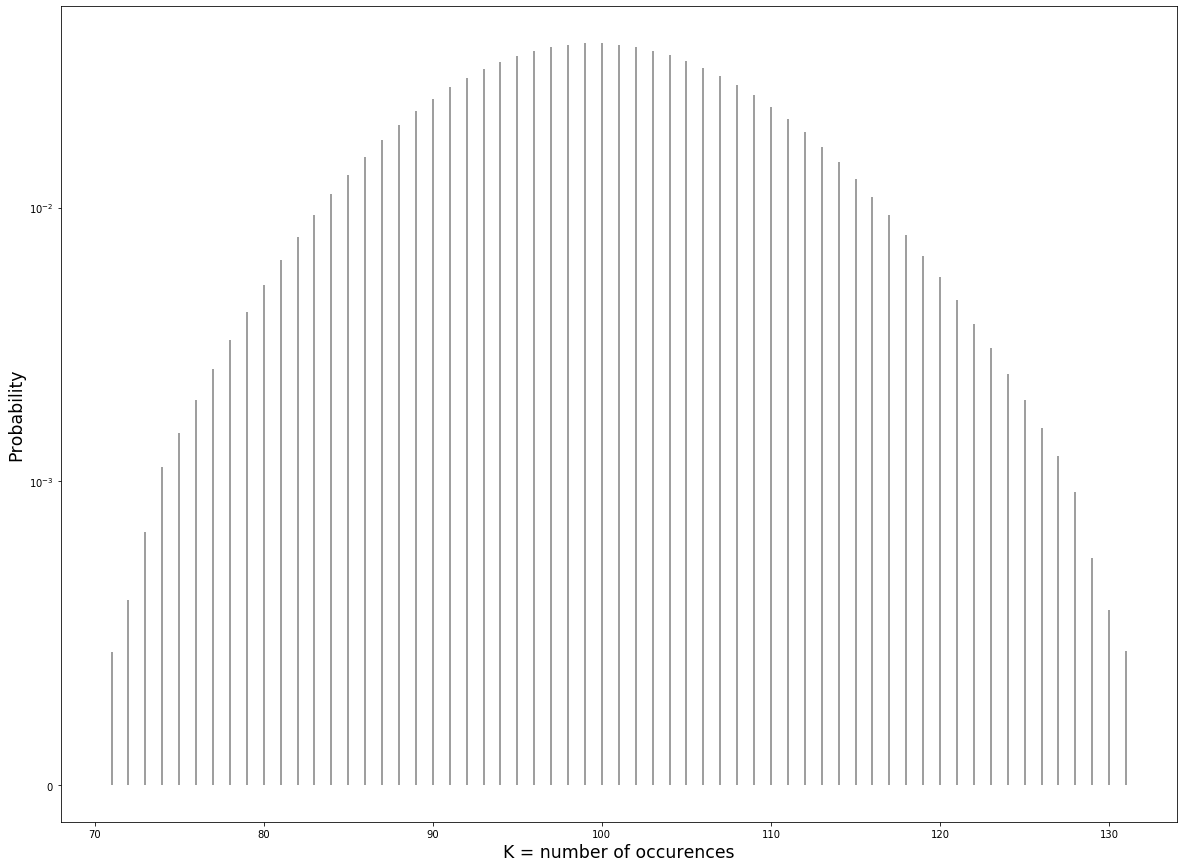

In [55]:
fig, ax = plt.subplots(1,1)

# Setting mean equal to 99 will allow a poisson distribution with a mean of 100
mean = 100

# Creating random variates
stats.poisson.rvs(mu=mean, loc=0, size=10000)

# Creating x axis of occurences for discrete events
x = np.arange(stats.poisson.ppf(0.001, mu=mean), stats.poisson.ppf(0.999, mu=mean))

# Plotted (occurences) vs (probability of number of occurences)
ax.vlines(x, ymin=0, ymax=stats.poisson.pmf(x, mu=mean), label='Background Poisson PMF', alpha=0.5)
ax.set_yscale('symlog', nonposy='clip', linthreshy=0.001)
ax.set_xlabel('K = number of occurences', fontsize='xx-large')
ax.set_ylabel('Probability', fontsize='xx-large')
plt.show()

In [62]:
sigma5 = 1-stats.norm.cdf(5, loc=0, scale=1)
print(f'Probability for finding a 5 sigma detection is a probability of {(sigma5):.3}')

high5 = stats.poisson.ppf(1-sigma5, mu=mean, loc=0)
print(f'The detection value on the occurence axis would need to be to be greater than or equal to {high5} in order to be considered a legitimate detection')

low5 = stats.poisson.ppf(sigma5, mu=mean, loc=0)
print(f'The detection value on the occurence axis would need to be less than or equal to {low5} occurences in order to be considered a legitimate detection')

Probability for finding a 5 sigma detection is a probability of 2.87e-07
The detection value on the occurence axis would need to be to be greater than or equal to 154.0 in order to be considered a legitimate detection
The detection value on the occurence axis would need to be less than or equal to 54.0 occurences in order to be considered a legitimate detection


- I find that the 5$\sigma$ threshold is any occurence count of 54 and below, or 154 and above, on the x-axis where my x-axis has a mean value of 100

## Problem 2)
- I now want to inject a signal of known strength (within the range of 8-30$\sigma$) into the background data many times.

In [4]:
X=8
sigmaX = stats.norm.sf(X)
sigmaX 
highX = stats.poisson.ppf(1-sigmaX, mu=mean, loc=0)
highX

190.0

In [5]:
a = stats.poisson.rvs(mu=mean, loc=0, size=35000, random_state=1)

b = [190, 191, 192, 193, 194, 189, 188, 187, 186]
for i in range(5):
    b = np.concatenate([b, b])
    b2 = b

for i in range(250):
    a = np.concatenate([a, b])
    a2 = a

print(max(a2))
print(min(a2))
print(len(a2))
b2

194
64
107000


array([190, 191, 192, 193, 194, 189, 188, 187, 186, 190, 191, 192, 193,
       194, 189, 188, 187, 186, 190, 191, 192, 193, 194, 189, 188, 187,
       186, 190, 191, 192, 193, 194, 189, 188, 187, 186, 190, 191, 192,
       193, 194, 189, 188, 187, 186, 190, 191, 192, 193, 194, 189, 188,
       187, 186, 190, 191, 192, 193, 194, 189, 188, 187, 186, 190, 191,
       192, 193, 194, 189, 188, 187, 186, 190, 191, 192, 193, 194, 189,
       188, 187, 186, 190, 191, 192, 193, 194, 189, 188, 187, 186, 190,
       191, 192, 193, 194, 189, 188, 187, 186, 190, 191, 192, 193, 194,
       189, 188, 187, 186, 190, 191, 192, 193, 194, 189, 188, 187, 186,
       190, 191, 192, 193, 194, 189, 188, 187, 186, 190, 191, 192, 193,
       194, 189, 188, 187, 186, 190, 191, 192, 193, 194, 189, 188, 187,
       186, 190, 191, 192, 193, 194, 189, 188, 187, 186, 190, 191, 192,
       193, 194, 189, 188, 187, 186, 190, 191, 192, 193, 194, 189, 188,
       187, 186, 190, 191, 192, 193, 194, 189, 188, 187, 186, 19

- Now the distribution has an injected signal of known strength (190 or 8$\sigma$) inserted into it many times over
### Problem 2A)
- I want a histogram showing how bright the observed signal appears to be

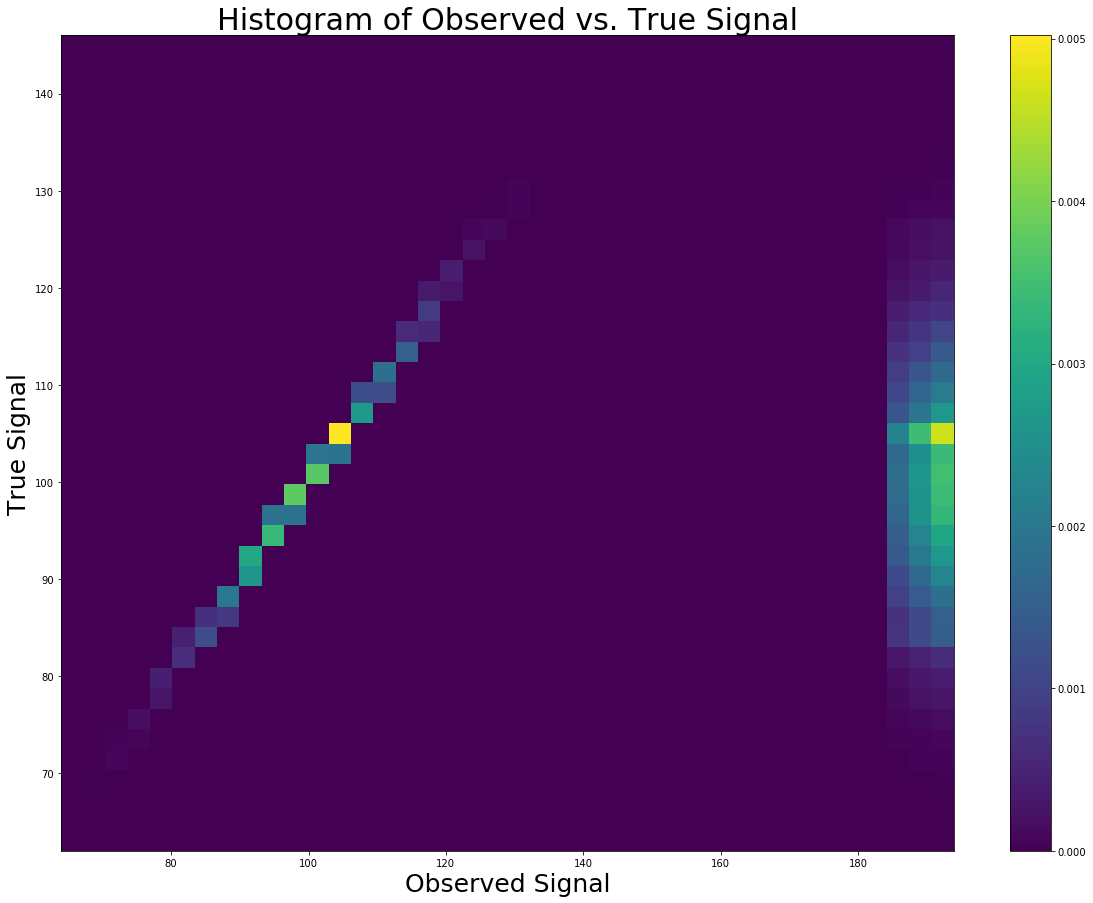

In [6]:
true = stats.poisson.rvs(mu=mean, loc=0, size=len(a2), random_state=1)
fig, ax = plt.subplots(1,1)
box = ax.hist2d(a2, true, bins=40, density=True)
ax.set_xlabel('Observed Signal', size=25)
ax.set_ylabel('True Signal', size=25)
ax.set_title('Histogram of Observed vs. True Signal', size=30)
boxp = plt.colorbar(box[3], ax=ax)
plt.show()

- The histogram shows that for any observed signal on the x-axis around 190, there is a chance that the true signal being shown is actually much lower. 
- I also see that measuring any observed signal of 190 gives me a higher probability for a true value centered around the mean than towards the low or high ends of the distribution
  - I.e. It's more likely that a true signal was to be found around the mean of 100 and then got distorted during measurement to become 190 something, than for a signal around 50 or 150 to be a true signal and to then be distorted with some injection during measurement to force it to be measured as 190.
  
### Problem 2B)
- Is the signal I observe biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?)
  - On the plot above, I want to know if our observed value is equally likely to be $y_{smaller}$ or $y_{larger}$, values that are less than or greater than the true signal value on the y-axis, given a particular x-value I observe.
  - I see on the plot above that for an observed signal value of $x=190$, it is highly likely that the observed signal will be much higher than the true signal. When I observe a signal of $x=190$, the most probable true signal value is around $y=100$, and values slightly less than $y=100$ are much more probable than values slightly more than $y=100$ so in general, $y_{smaller}$ is much more likely than $y_{larger}$
- Since I observe unequal probabilities for $y_{smaller}$ and $y_{larger}$, the bias I observe is not symmetric. 
## Problem 3)
- Now I want to make a suite of injected signals. I will want to have a range of injected signal strengths, starting at zero and extending well above 5$\sigma$ (30$\sigma$ or more)
### Problem 3A)

(599, 39)

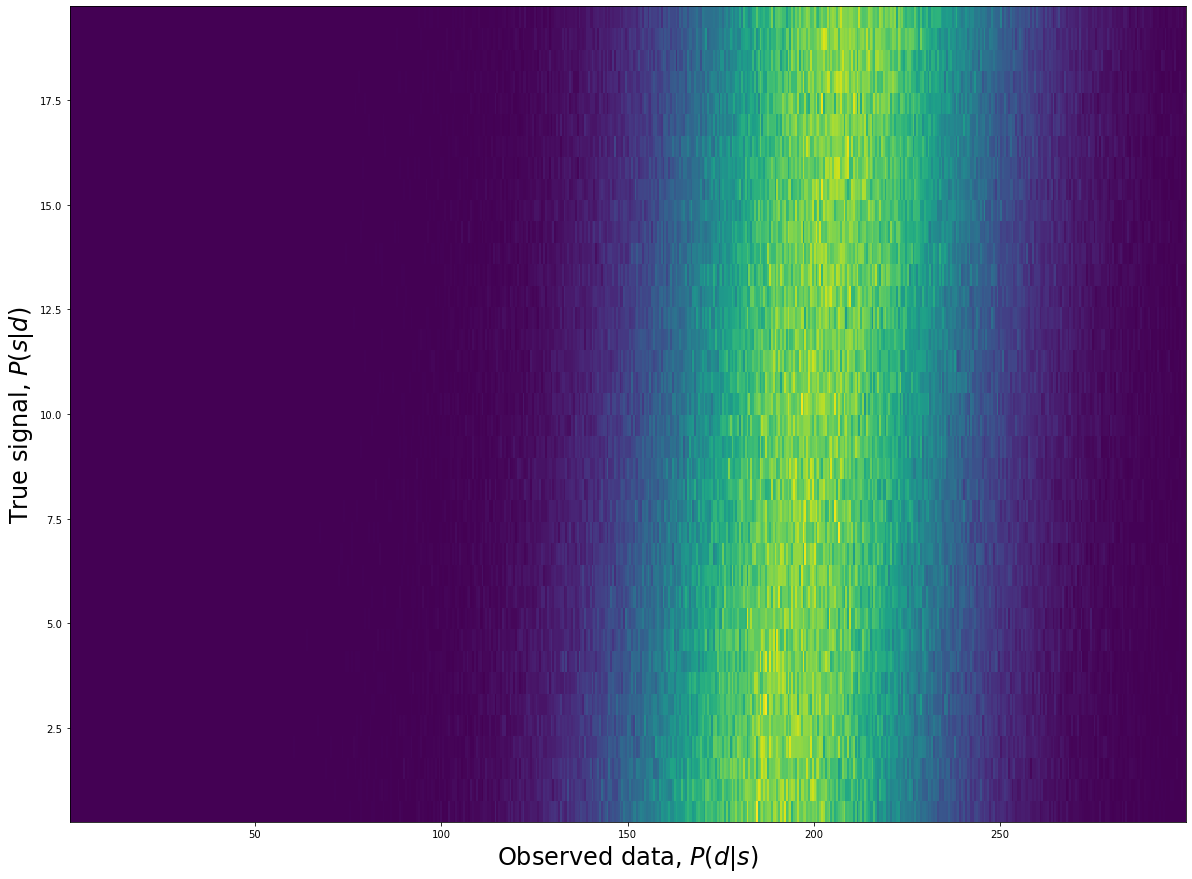

In [7]:
bkgd = stats.norm.rvs(loc=190, scale=30, size=1000000, random_state=1)
# background injection is values centered around 30 with standard deviation of 30
signal = stats.uniform.rvs(loc=0, scale=20, size=1000000, random_state=2)

data = bkgd + signal
signaledges = np.linspace(0,20,40) # Y axis steps
dataedges = np.linspace(0,300,600) # X axis steps

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
Psd.shape

- The 2D plot above shows **Observed Data** $[P(d|s)]$ on the x-axis and **True Injected Signal** $[P(s|d)]$ on the y-axis
  - The extreme background distribution injection with a mean of 190 and a standard deviation of 30$\sigma$ causes major spread in the probability distributions for both horizontal and vertical slices. 
### Problem 3B)
- For example, if I take a horizontal slice for an injected signal of 15, (or slice at $y=15$), I will see that the range of probable observed measurements for that true signal value, and ***it will not be centered on an equal observed value to the true signal value of 15***
  - I am graphically selecting a y-value from my 'dataedges' array closest to 15, and this **$i^{th}$** value will be equal to the number of steps from 0 to 15, knowing that each step is $\frac{20-0}{40}=\frac{20}{40}=0.5$ units, and that the distance in units to get to 15 from 0 is **15 y-axis units**, my value will be the $\frac{15}{0.5}=30^{th}$ value on the **signaledges** array

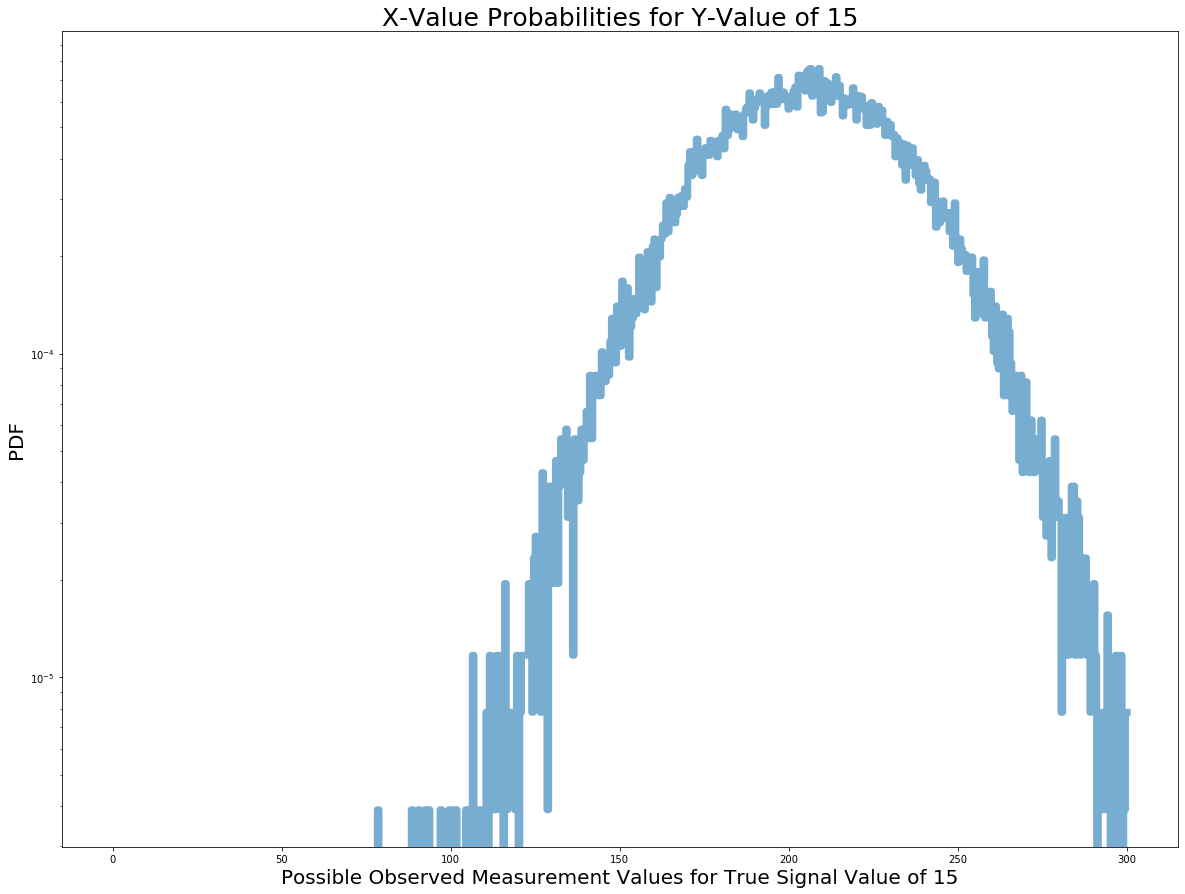

The y-value closest to 15 in the y-axis of the 2D histogram is y=15.384615384615383


In [8]:
dataedges = np.linspace(0,300,600)

# Find the x-axis pdf distribution associated with the 19th value in the y-axis array portion of the 2D Histogram above
ysliceA = Psd[:,30]
# I must recreate x-axis 'dataedges' to match the size of the number of y-values that equal 15 in the y-axis distribution
dataedges = np.linspace(0,300,599)

fig, ax = plt.subplots(1,1)
plt.yscale('log')
plt.xlabel('Possible Observed Measurement Values for True Signal Value of 15', size=20)
plt.ylabel('PDF', size=20)
plt.title('X-Value Probabilities for Y-Value of 15', size=25)
ax.step(dataedges, ysliceA, alpha=0.6, linewidth=7)
plt.show()
print(f'The y-value closest to 15 in the y-axis of the 2D histogram is y={signaledges[30]}')

- The plot shows that even with an extremely wide distribution injected into the data, the most probable observed measurement is ***NOT*** an observed measurement of $x=15$. The plot is telling me that if I receive a true signal of $y=15$ into my detector, I would most likely measure an observed signal value of around 215 instead.
### Problem 3C)
- What if I take a vertical slice at some set observed measurement (single set x-value), what would the distribution of possible true signals look like?
   - If I observe a measurement of 290 ($x=290$), what is the distribution of true signal values (y-values) that could be associated with my measurement?
   - - I am graphically selecting a x-value from my data closest to 290, and this **$i^{th}$** value will be equal to the number of steps from 0 to 290, knowing that each step is $\frac{20-0}{40}=\frac{20}{40}=0.5$ units, and that the distance in units to get to 290 from 0 is **290 x-axis units**, my value will be the $\frac{290}{0.5}=580^{th}$ value on the **dataedges** array

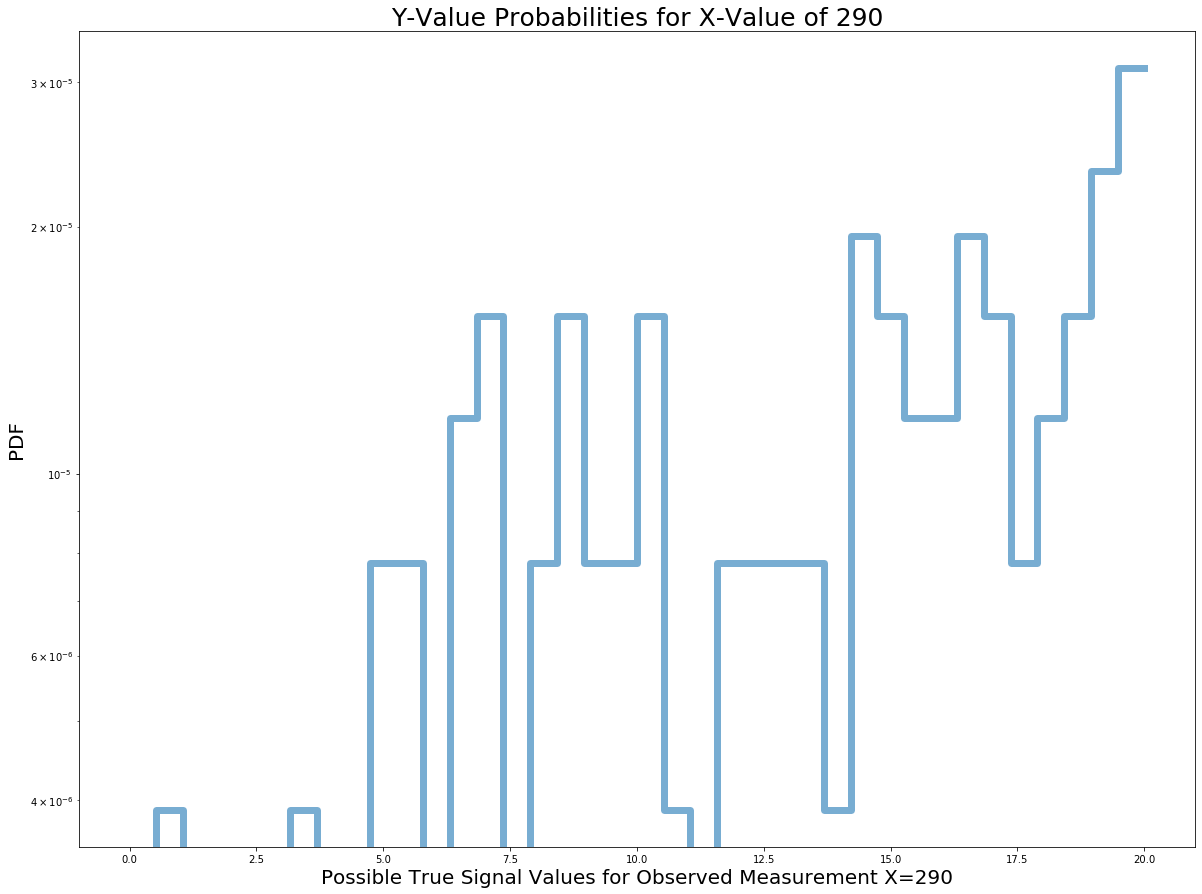

the x-value closest to 290 in the 2D histogram plot is 290.96989966555185


In [9]:
signaledges = np.linspace(0,20,40)

# Find the x-axis pdf distribution associated with the 19th value in the y-axis array portion of the 2D Histogram above
xsliceA = Psd[580,:]
# I must recreate y-axis 'signaledges' to match the size of the number of y-values that equal 15 in the y-axis distribution
signaledges = np.linspace(0,20,39) # Y axis steps

fig, ax = plt.subplots(1,1)
plt.yscale('log')
plt.xlabel('Possible True Signal Values for Observed Measurement X=290', size=20)
plt.ylabel('PDF', size=20)
plt.title('Y-Value Probabilities for X-Value of 290', size=25)
ax.step(signaledges, xsliceA, alpha=0.6, linewidth=7)
plt.show()
print(f'the x-value closest to 290 in the 2D histogram plot is {dataedges[580]}')

- The plot above shows that for any measurement of a true signal that I get to be $x=290$, the most likely true signal value, (*acknowledging that the signals can only be found between 0 and 20, which is why the plot only shows that range of values on the x-axis*) is around $y=20$
- If I was not aware that true signals could only be found between 0 and 20, It would be very hard to know whether or not what I observed was injected with some kind of background (e.g. If i was unaware of the injection, the true signal would be very hard to deduce given the wide range of the injected distribution.
### Problem 3D) 
- For my observed signal, I now I want to know what is the $1\sigma$ uncertainty on the true signal strength when I observe the same signal of $x=290$
  - Using my plot and results from Problem 3C, I want to know the uncertainty's upper and lower values such that I can report $Y^{+A}_{-B}$ where $Y=$mean true signal value when observed signal equals 290, $A=$upper uncertainty value, and $B=$lower uncertainty value

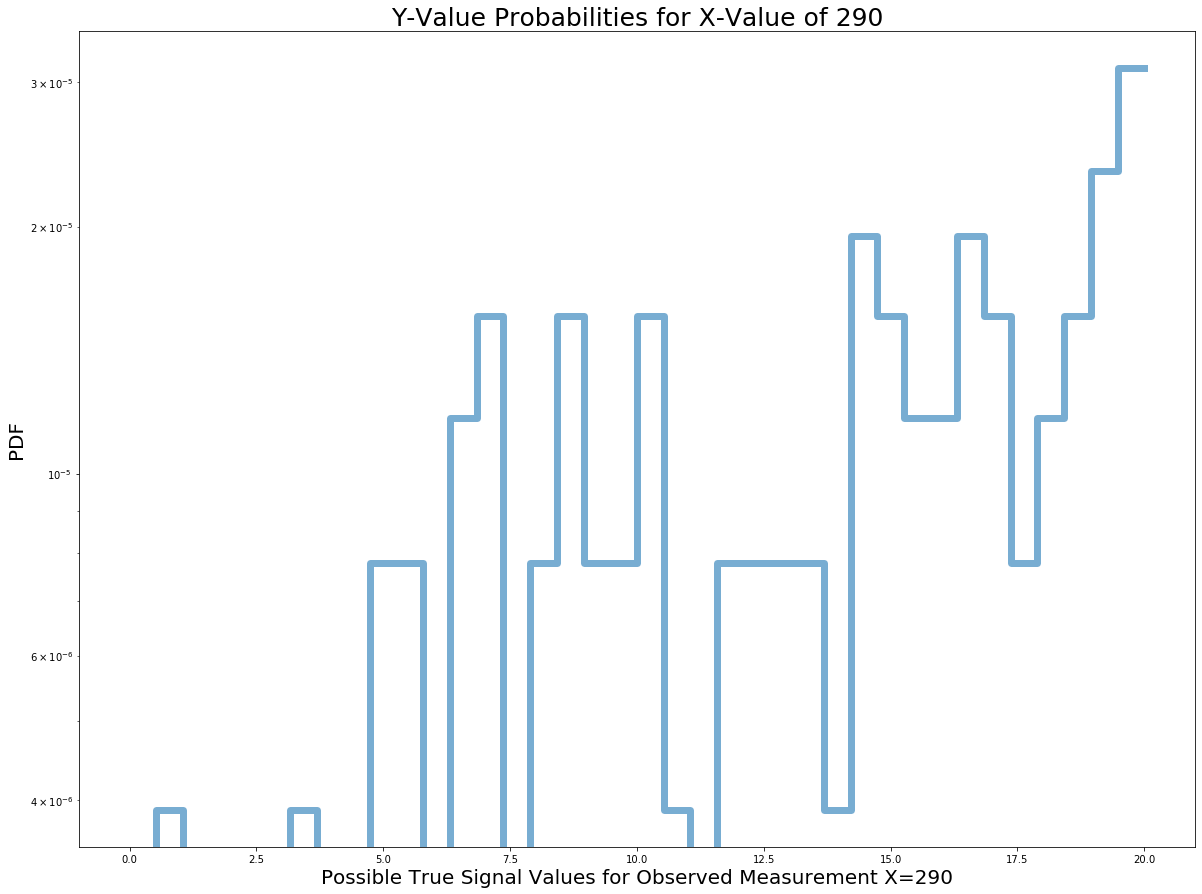

the x-value closest to 290 in the 2D histogram plot is 290.96989966555185
the highest possible probability in the distribution is 3.116448601310216e-05 which is associated with a True signal value of 20.0


In [25]:
# Replotting 3C Distribution for xsliceA
signaledges = np.linspace(0,20,40)

# Find the x-axis pdf distribution associated with the 19th value in the y-axis array portion of the 2D Histogram above
xsliceA = Psd[580,:]
# I must recreate y-axis 'signaledges' to match the size of the number of y-values that equal 15 in the y-axis distribution
signaledges = np.linspace(0,20,39) # Y axis steps

fig, ax = plt.subplots(1,1)
plt.yscale('log')
plt.xlabel('Possible True Signal Values for Observed Measurement X=290', size=20)
plt.ylabel('PDF', size=20)
plt.title('Y-Value Probabilities for X-Value of 290', size=25)
ax.step(signaledges, xsliceA, alpha=0.6, linewidth=7)
plt.show()
print(f'the x-value closest to 290 in the 2D histogram plot is {dataedges[580]}')
print(f'the highest possible probability in the distribution is {xsliceA.max()} which is associated with a True signal value of {signaledges[38]}')

In [23]:
# Showing that value with highest probability in the plot is signal=20.0
for i in range(len(signaledges)):
    if xsliceA[i] == xsliceA.max():
        print(xsliceA[i]), print(signaledges[i]), print(i)

3.116448601310216e-05
20.0
38
0.0003272271031375737


- Since the peak value for $x=290$ is the max true signal value $y=20$, the integration of the distribution over the upper value range of $+34%$ will return a value of zero, because there is no probability of getting a value of anything greater than 20. 
  - Therefore, $A=0$
- Now I want to integrate for all values between lower bound $20(1-.34)$ and mean $20$ to find the lower value limit B for this probability distribution slice
  - In other words, the area under the curve is the error value that I am looking for equal to B, so I integrate from a lower to an upper bound, where the upper bound is the mean of 20, and the total length covered by the bounds is 34% of the whole distribution from 0 to 20.

In [52]:
lowerb = 20 - (0.34*(20))
meanb = 20
print(lowerb)
print(meanb)
#now I want a distribution of just my range of values between 
rangeb = []
for i in range(len(signaledges)):
    if signaledges[i] >= lowerb and signaledges[i] <= meanb:
        rangeb.append(xsliceA[i])
print(rangeb)

13.2
20
[7.791121503275569e-06, 3.8955607516377845e-06, 1.9477803758188922e-05, 1.5582243006551138e-05, 1.1686682254913353e-05, 1.1686682254913353e-05, 1.947780375818899e-05, 1.558224300655108e-05, 7.79112150327554e-06, 1.1686682254913393e-05, 1.558224300655119e-05, 2.3373364509826628e-05, 3.116448601310216e-05]


- Now I want to know what indices to integrate over in signaledges

In [54]:
# To integrate over a probability function I need the cdf of the probabilities in the range of 13.2-20, and then I need to sum those CDF outputs
lowerbound = sum(stats.norm.sf(rangeb, loc=20, scale=np.std(signaledges)))
lowerbound

12.995226089218301

- Therefore I can report my bounds for a distribution centered around a signal of $x=290$ as $y=20.0^{+0}_{-12.99}$ since y is limited to be between 0 and 20

- Therefore, I can see that any observed value of $x=290$ has a y-value $1\sigma$ uncertainty value of +0, -12.99. This means that when an x-measurement of 290 occurs, the confidence in the deduction of the true signal y-value associated with that measurement is very low. 
### Problem 3E)
- The distribution of the uncertainty is biased to be less than the value of the average value through the fact that I am aware that the true signal value has an average of $y=20$ when $x=290$, but that the uncertainty only applies to values less than 20, because no signal can be greater than 20. It is also seen to be assymmetric for the same reasons